<a href="https://colab.research.google.com/github/paulabria/Proyectos_Cursos/blob/main/BRIA_proyecto_salarios_en_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Estrategias de contratación**
**Contexto:**
<p align="justify">En el competitivo mercado laboral actual, las empresas se esfuerzan por atraer y retener a los mejores talentos de la ciencia de datos sin exceder su presupuesto. Comprender las tendencias salariales es crucial para optimizar las estrategias de contratación y realizar ofertas salariales competitivas.</p>

**Este proyecto:**
<p align="justify">Una empresa argentina quiere optimizar su estrategia de contratación para atraer a los mejores talentos, sin exceder su presupuesto. En este sentido, se obtendrá información que ayude a la empresa a tomar decisiones informadas para optimizar su estrategia de contratación, hacer ofertas salariales competitivas, y atraer y retener a los mejores talentos de la ciencia de datos.</p>

<p align="justify">Dicha empresa desea contratar personal para los siguientes roles:

* Data Science Consultant,
* Data Science Lead,
* Research Scientist,
* Finance Data Analyst / Financial Data Analyst,
* Data Scientist,
* Data analyst. </p>




Las variables que componen el data set son:

* work_year: El año en que se pagó el salario.

* experience_level: El nivel de experiencia en el trabajo durante el año.

* employment_type: El tipo de empleo para el puesto.

* job_title: El cargo en el que se trabajó durante el año.

* salary: La cantidad total de salario bruto pagado. (Aunque la fuente del data set no lo informa fehacientemente, se estima que se trata del salario anual)

* salary_currency: La moneda del salario pagado, en código de moneda ISO 4217.

* salaryinusd: El salario en USD.

* employee_residence: País de residencia principal del empleado durante el año de trabajo, en código de país ISO 3166.

* remote_ratio: La cantidad general de trabajo realizado de forma remota. (Durante ese año. Se estima que está en %)

* company_location: País de la sede principal del empleador o sucursal de contratación.

* company_size: Número medio de personas que trabajaron para la empresa durante el año.


Fuente del dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [ ]:
import pandas as pd

salarios = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv")

## Exploración del data set

In [ ]:
salarios.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
salarios.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [ ]:
salarios.shape

#3754 registros (excluyendo los encabezados), 11 variables/columnas

(3755, 11)

In [ ]:
salarios.info()

#los tipos de variables parecen estar bien.
#intenté cambiar a date el work_year, pero no me salió bien. (como interpretaba una fecha entera, al cambiarlo después a año me cambiaba todo.
#Y si lo quiero poner directamente en años me dice que primero tengo que hacer el paso de ponerlo como tipo fecha).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


**Exploración de valores únicos**

In [ ]:
salarios['work_year'] = salarios['work_year'].astype(str) #primero cambié el año a string

In [ ]:
salarios['work_year'] = pd.to_datetime(salarios['work_year'], format='%Y')
salarios['work_year'] = salarios['work_year'].dt.year #después lo cambié a data especificando que se trata sólo de años %Y

In [ ]:
salarios.dtypes #ahora sí tengo la variable work_year como datetime

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
salarios['work_year'].unique()

array([2023, 2022, 2020, 2021])

Los datos son de los años 2020 a 2023.

In [ ]:
salarios['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

Se infiere que:

SE = senior

MI = mid-level

EN = entry-level

EX = executive

In [ ]:
salarios['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

FT = full time

CT = contract

FL = freelance

PT = part time

(son suposiciones, ya que la fuente del data set no lo especificó. En el caso de tratarse de un trabajo real, debería consultar con el DBA para no cometer errores posteriores).

In [ ]:
jt = salarios['job_title'].unique()

jt2 = sorted(jt)
jt2

['3D Computer Vision Researcher',
 'AI Developer',
 'AI Programmer',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Scientist',
 'Autonomous Vehicle Technician',
 'Azure Data Engineer',
 'BI Analyst',
 'BI Data Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence Engineer',
 'Cloud Data Architect',
 'Cloud Data Engineer',
 'Cloud Database Engineer',
 'Compliance Data Analyst',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Consultant',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Analytics Specialist',
 'Data Architect',
 'Data DevOps Engineer',
 'Data Engineer',
 'Data Infrastructure Engineer',
 'Data Lead',
 'Data Management Specialist',
 'Data Manager',
 'Data Modeler',
 'Data Operations Analyst'

In [ ]:
salarios['salary_currency'].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

Teniendo en cuenta que una de las variables tiene los salarios expresados en distintos tipos de moneda, se optará por trabajar con la columna que tiene los salarios expresados en USD, siempre que se esté trabajando con países y monedas distintas.

In [ ]:
residence = salarios['employee_residence'].unique()

In [ ]:
rs = sorted(residence)

print(rs)

['AE', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BG', 'BO', 'BR', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JE', 'JP', 'KE', 'KW', 'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK', 'PL', 'PR', 'PT', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK', 'TH', 'TN', 'TR', 'UA', 'US', 'UZ', 'VN']


In [ ]:
salarios['remote_ratio'].unique()

array([100,   0,  50])

Se infiere que se trata de porcentajes del trabajo realizado en remoto (0%, 50%, 100%)

0%= presencial

50%= modalidad mixta

100%= completamente remoto

In [ ]:
location = salarios['company_location'].unique()

In [ ]:
loc = sorted(location)
print(loc)

['AE', 'AL', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BO', 'BR', 'BS', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JP', 'KE', 'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK', 'PL', 'PR', 'PT', 'RO', 'RU', 'SE', 'SG', 'SI', 'SK', 'TH', 'TR', 'UA', 'US', 'VN']


In [ ]:
salarios['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

L= Large

M= Medium

S= Small

**Agregado de una nueva columna**

In [ ]:
#salario mensual aproximado con dos decimales

salarios['mensual_aprox'] = round(salarios['salary_in_usd'] / 12, 2)


In [ ]:
salarios.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,mensual_aprox
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,7153.92
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2500.00
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2125.00
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,14583.33
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,10000.00


## Limpieza

In [ ]:
salarios.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
salarios.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No hay datos faltantes ni nulos.

In [ ]:
sl_descriptivo = salarios.drop(['work_year', 'remote_ratio',], axis=1) #elimino columnas que no tiene sentido analizar en este punto

## **Analisis descriptivo del data set**

In [ ]:
round(salarios.describe(),2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [ ]:
round(sl_descriptivo.describe(),2)

,salary,salary_in_usd,mensual_aprox
count,3755.00,3755.00,3755.00
mean,190695.57,137570.39,11464.20
std,671676.50,63055.63,5254.64
min,6000.00,5132.00,427.67
25%,100000.00,95000.00,7916.67
50%,138000.00,135000.00,11250.00
75%,180000.00,175000.00,14583.33
max,30400000.00,450000.00,37500.00


Hay un total de 3754 registros en el dataset para todas las columnas (no hay NAs).

Este análisis descriptivo es muy general. Los salarios pueden variar sustancialmente en función del país donde se encuentra el empleado, el país donde se encuentra la empresa, la modalidad de trabajo, la posición ocupada y el grado de expertise.

En el código que sigue queda en evidencia que los números anteriores deben ser tomados con pinzas. Se observan los salarios por locación de la compañía, en su moneda local, y se ven las variaciones nominales enormes que hay:

In [ ]:
# Agrupar los valores por la columna'company_location'
grupo_pais = salarios.groupby('company_location')

# Iterar sobre los grupos y mostrar solo la columna 'salary'
for nombre_grupo, grupo in grupo_pais:
    print(f"Grupo: {nombre_grupo}")
    print(grupo['salary'].unique())
    print()

Grupo: AE
[120000  65000 115000]

Grupo: AL
[10000]

Grupo: AM
[50000]

Grupo: AR
[12000 13000 50000]

Grupo: AS
[  20000   50000 1335000]

Grupo: AT
[85000 50000 59000 65000 52000 80000]

Grupo: AU
[ 70000  50000  40000 171000 100000 120000  65000  56000  77000 193000
 121000 150000]

Grupo: BA
[120000]

Grupo: BE
[80000 49500 70000 75000]

Grupo: BO
[7500]

Grupo: BR
[ 48000 101400  78000  42000  84000  54000  40300  32400  24000  69600
 102000]

Grupo: BS
[45555]

Grupo: CA
[175000 120000 219000 141000  90000  72000  15000 224000 176000  55000
 275000  70000 135000 115000  95000 258000 190000 160000 145000 260000
 110000 130000 100000 269000 158000  50000 248100 145900 170000 153000
  94000 143100 113000 248400 183600 200000 227200 168000 178000 132000
 137000  65000 187200 116100  96000 210000 164000 140000 185800 137400
 150000 192400  90700  61300  85000  75000  67000  52000 157000 250000
  88000  66500 159500  68000 235000 125000  80000 120500 225000]

Grupo: CF
[45000 35000]

G

A continuación realizaré los descriptivos de los **salarios anuales en dólares** agrupando por:


*   País de la compañía
*   Modalidad de trabajo
*   Expertise
* Puesto + expertise




Por país de la compañía:

In [ ]:
# Group by 'company_location'
cl = round(salarios.groupby('company_location')['salary_in_usd'].describe(include='all'),2)

pd.set_option('display.max_rows', None) #para mostrar todas las filas

#ordenar los descriptivos por count

cl_sorted = cl.sort_values('count', ascending=False)

cl_sorted

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,3040.0,151822.01,56018.54,5679.0,113900.00,145000.0,185000.00,450000.0
GB,172.0,86890.05,43405.34,30000.0,60761.00,79513.0,103328.50,430967.0
CA,87.0,131917.69,61182.47,15000.0,80907.00,120000.0,175500.00,275000.0
ES,77.0,57676.06,40633.66,10354.0,37825.00,47280.0,59020.00,253750.0
IN,58.0,30197.74,41372.48,5409.0,13617.00,18276.0,30499.25,300000.0
DE,56.0,88288.80,54979.29,15966.0,59895.50,72721.5,91691.50,275000.0
FR,34.0,66138.74,27963.47,20000.0,50064.75,58969.5,77042.00,152000.0
BR,15.0,40579.20,28739.43,6270.0,15904.00,42000.0,66000.00,84000.0
PT,14.0,50538.71,18889.85,21013.0,36969.25,52932.5,67768.00,75116.0


Siendo muchos países, y que muchos de ellos tienen un solo caso informado, se optará por trabajar con todos los países en conjunto.

Descriptivos según modalidad de trabajo:

In [ ]:
# Group by
rr = round(salarios.groupby('remote_ratio')['salary_in_usd'].describe(include='all'),2)

rr

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,1923.0,144316.20,59799.97,5882.0,105200.0,139600.0,179820.0,450000.0
50,189.0,78400.69,61326.13,5409.0,40570.0,63312.0,100000.0,423000.0
100,1643.0,136481.45,63373.51,5132.0,90000.0,135000.0,180000.0,416000.0


Se paga más por trabajo 100% presencial.

Entre el trabajo 100% remoto y la modalidad mixta hay algunas diferencias. Aunque las medias son bastante distintas, podría ser por la presencia de valores atípicos (que se verán en el boxplot). No obstante, en el mínimo y el máximo no hay demasiadas diferencias. Si la empresa no tuviera problemas en contratar a alguien que haga trabajo 100% remoto, sería la opción más económica, teniendo en cuenta el mínimo. Aunque, si necesitaran de algo de presencialidad, por poca diferencia podrían pagar empleados que trabajen remoto y presencial.

Descriptivos según expertise/nivel de experiencia:

In [ ]:
from numpy import exp2
# Group by
exp = round(salarios.groupby('experience_level')['salary_in_usd'].describe(include='all'),2)

exp

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,320.0,78546.28,52225.42,5409.0,40000.0,70000.0,110009.25,300000.0
EX,114.0,194930.93,70661.93,15000.0,145000.0,196000.0,239000.00,416000.0
MI,805.0,104525.94,54387.69,5132.0,66837.0,100000.0,135000.00,450000.0
SE,2516.0,153051.07,56896.26,8000.0,115000.0,146000.0,185900.00,423834.0


SE = senior

MI = mid-level

EN = entry-level

EX = executive

Si la empresa quisiera contratar para algunos puestos gente mucho más experimentada, se recomienda contratación de recursos senior. La diferencia de salario con el nivel executive es alta.

Sin embargo, si lo que se busca es contratar recursos con menor expertise, es recomendable un mid-level. Esto se sustenta en la diferencia de medias con el entry-level, y en que el mínimo es incluso más bajo en mid que en entry-level. Por otra parte, la diferencia se capitaliza en el ahorro en capacitaciones.

Ahora quiero ver el salario en USD de los roles que la empresa está buscando, teniendo en cuenta el nivel de expertise:

In [ ]:
# Filtro el data frame para tener sólo los roles que la empresa busca
job_titles = ['Data Science Consultant', 'Data Science Lead', 'Research Scientist', 'Finance Data Analyst', 'Financial Data Analyst', 'Data Scientist', 'Data analyst']
df = salarios[salarios['job_title'].isin(job_titles)]

# Group by job_title y experience_level y pido el describe
salarios_pr = round(df.groupby(['job_title', 'experience_level'])['salary_in_usd'].describe(), 2)

salarios_pr

count       mean       std  \
job_title               experience_level                               
Data Science Consultant EN                  7.0   52098.00  32517.54   
                        EX                  1.0   69741.00       NaN   
                        MI                  5.0   76980.40  19872.78   
                        SE                 11.0  115359.36  33225.17   
Data Science Lead       MI                  3.0   94558.33  48396.88   
                        SE                  5.0  193400.00  40644.99   
Data Scientist          EN                 59.0   74085.97  44628.96   
                        EX                 12.0  180645.83  56276.56   
                        MI                161.0   93945.82  46279.30   
                        SE                608.0  158990.96  53857.53   
Finance Data Analyst    SE                  1.0   61896.00       NaN   
Financial Data Analyst  EN                  1.0  100000.00       NaN   
                        MI                  2.0  102500.00  38890.87   
Research Scientist      EN                  9.0  118280.89  50573.65   
                        EX                  1.0   84053.00       NaN   
                        MI                 23.0  141575.09  97026.81   
                        SE                 49.0  179892.98  61044.03   

                                               min       25%       50%  \
job_title               experience_level                                 
Data Science Consultant EN                  5707.0   25741.0   63831.0   
                        EX                 69741.0   69741.0   69741.0   
                        MI                 51716.0   70000.0   70186.0   
                        SE                 29453.0  108250.0  122000.0   
Data Science Lead       MI                 60761.0   66837.5   72914.0   
                        SE                156400.0  165000.0  172200.0   
Data Scientist          EN                  9727.0   39920.5   73742.0   
                        EX                100000.0  145000.0  172000.0   
                        MI                  5679.0   57872.0   90000.0   
                        SE                 20171.0  129300.0  155500.0   
Finance Data Analyst    SE                 61896.0   61896.0   61896.0   
Financial Data Analyst  EN                100000.0  100000.0  100000.0   
                        MI                 75000.0   88750.0  102500.0   
Research Scientist      EN                 42000.0  100000.0  100000.0   
                        EX                 84053.0   84053.0   84053.0   
                        MI                 23000.0   69999.5  125000.0   
                        SE                 50000.0  145900.0  169200.0   

                                                75%       max  
job_title               experience_level                       
Data Science Consultant EN                 76833.00   90000.0  
                        EX                 69741.00   69741.0  
                        MI                 90000.00  103000.0  
                        SE                133500.00  145000.0  
Data Science Lead       MI                111457.00  150000.0  
                        SE                225900.00  247500.0  
Data Scientist          EN                100000.00  190000.0  
                        EX                200000.00  300000.0  
                        MI                120402.00  225000.0  
                        SE                190368.75  412000.0  
Finance Data Analyst    SE                 61896.00   61896.0  
Financial Data Analyst  EN                100000.00  100000.0  
                        MI                116250.00  130000.0  
Research Scientist      EN                150000.00  220000.0  
                        EX                 84053.00   84053.0  
                        MI                185000.00  450000.0  
                        SE                210000.00  370000.0

Si bien en muchos de estos agrupamientos no hay suficientes datos, en líneas generales se observa que lo más conveniente en términos económicos, para todos los puestos, es el nivel medio de experiencia. Aunque para data science lead, por las características que requiere dicho rol, sería recomendable tomar como referencia los datos de la experiencia senior (M= USD 193.400).

(De todas formas, hay que tener en cuenta la presencia de outliers)

## Visualización

In [ ]:
salarios.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'mensual_aprox'],
      dtype='object')

In [ ]:
salarios.drop(['work_year','salary_currency','salary','employee_residence','company_location','mensual_aprox'], axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# Definir la lista a matchear de job_title
lista_job = ['Data Science Consultant', 'Data Science Lead', 'Research Scientist', 'Financial Data Analyst', 'Data Scientist', 'Data analyst']

# Filtrar basado en la lista hecha recién
filtrado2 = salarios[salarios['job_title'].isin(lista_job)]

# Crear la nueva columna
salarios['job_title_buscados'] = filtrado2['job_title']


In [ ]:
#CATPLOT por expertise EN y MI

# Filtrar los registros que contengan "SE" o "EX" en la columna 'experience_level'
filt = salarios[salarios['experience_level'].str.contains('EN|MI')]

# Crear la nueva columna 'experience_level2' con los valores extraídos
salarios['experience_level2'] = filt['experience_level']

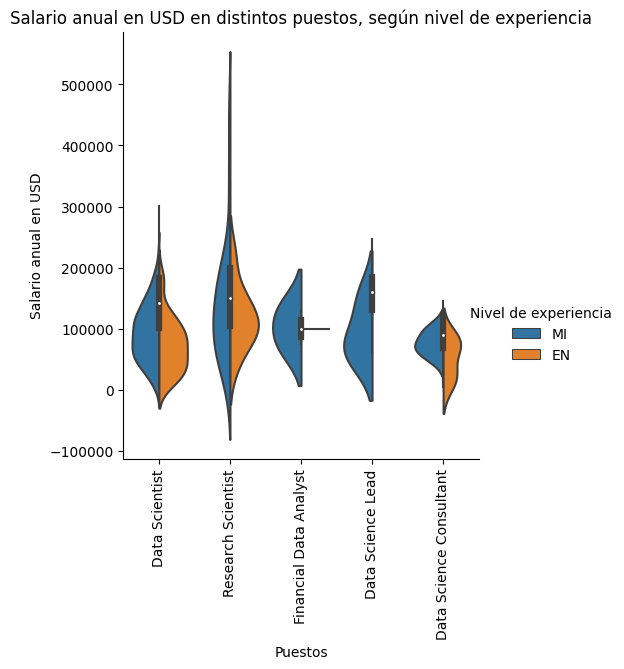

In [ ]:
catplot = sns.catplot(data=salarios, kind="violin", x="job_title_buscados", y="salary_in_usd", hue="experience_level2", split=True)

sns.set(rc={'figure.figsize':(40,40)})  # Ajustar los valores de ancho y alto

plt.xticks(rotation=90) #ajusto las etiquetas de los valores de x
plt.xlabel('Puestos')
plt.ylabel('Salario anual en USD')
plt.title('Salario anual en USD en distintos puestos, según nivel de experiencia')

ax = catplot.ax

catplot._legend.set_title("Nivel de experiencia")

Se puede ver que la variación en la distribución no es muy acentuada, y que incluso los salarios pueden ser menores que los entry en los niveles medios de experiencia.

No se incluyó Finance data analyst por falta de registros suficientes.

In [ ]:
#CATPLOT por expertise senior y executive

# Filtrar los registros que contengan "SE" o "EX" en la columna 'experience_level'
filt = salarios[salarios['experience_level'].str.contains('SE|EX')]

# Crear la nueva columna 'experience_level_max' con los valores extraídos
salarios['experience_level_max'] = filt['experience_level']

#la columna job_title_buscados ya estaba hecha. No haría falta repetirla.

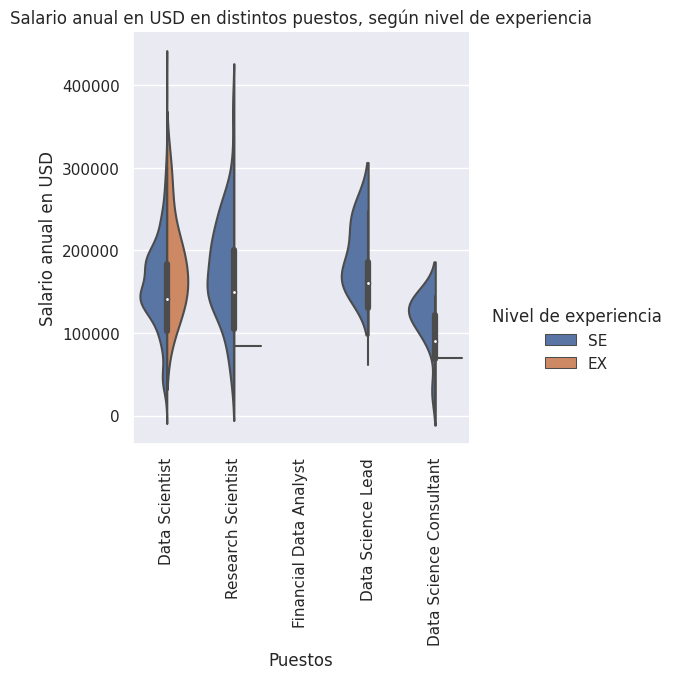

In [ ]:
catplot = sns.catplot(data=salarios, kind="violin", x="job_title_buscados", y="salary_in_usd", hue="experience_level_max", split=True)

sns.set(rc={'figure.figsize':(40,40)})  # Ajustar los valores de ancho y alto

plt.xticks(rotation=90) #ajusto las etiquetas de los valores de x
plt.xlabel('Puestos')
plt.ylabel('Salario anual en USD')
plt.title('Salario anual en USD en distintos puestos, según nivel de experiencia')

ax = catplot.ax

catplot._legend.set_title("Nivel de experiencia")

No hay muchos datos de nivel executive. Este gráfico no aporta mucho.

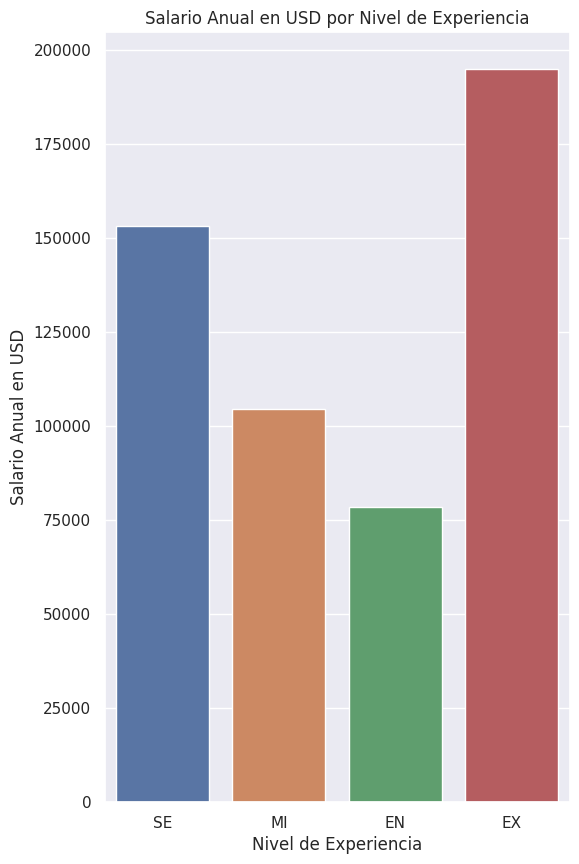

In [ ]:
# Bar plot gráfico de barras
sns.barplot(data=salarios, x='experience_level', y='salary_in_usd', errorbar=None)

# Labels
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Anual en USD')
plt.title('Salario Anual en USD por Nivel de Experiencia')

sns.set(rc={'figure.figsize': (6, 4)})

plt.show()

Aquí se ve también que la diferencia entre los niveles entry y middle no es tanta. Asimismo, que el nivel executive tiene mucho mejor salario que el senior.

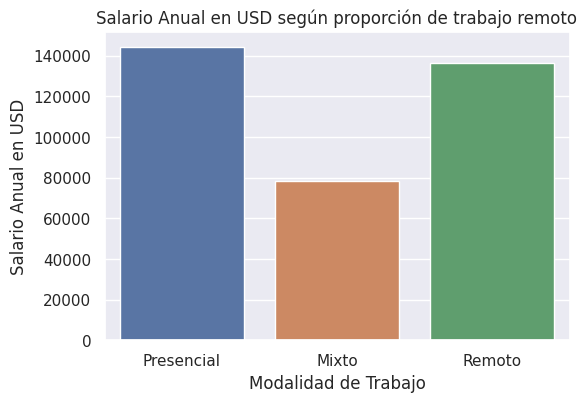

In [ ]:
# Bar plot gráfico de barras
sns.barplot(data=salarios, x='remote_ratio', y='salary_in_usd', errorbar=None)

# Labels
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Salario Anual en USD')
plt.title('Salario Anual en USD según proporción de trabajo remoto')
plt.xticks(ticks=[0, 1, 2], labels=['Presencial', 'Mixto', 'Remoto'])

sns.set(rc={'figure.figsize': (8, 6)})

plt.show()

Como ya se había observado en los descriptivos, la modalidad mixta es la que mejor se adaptaría al presupuesto.

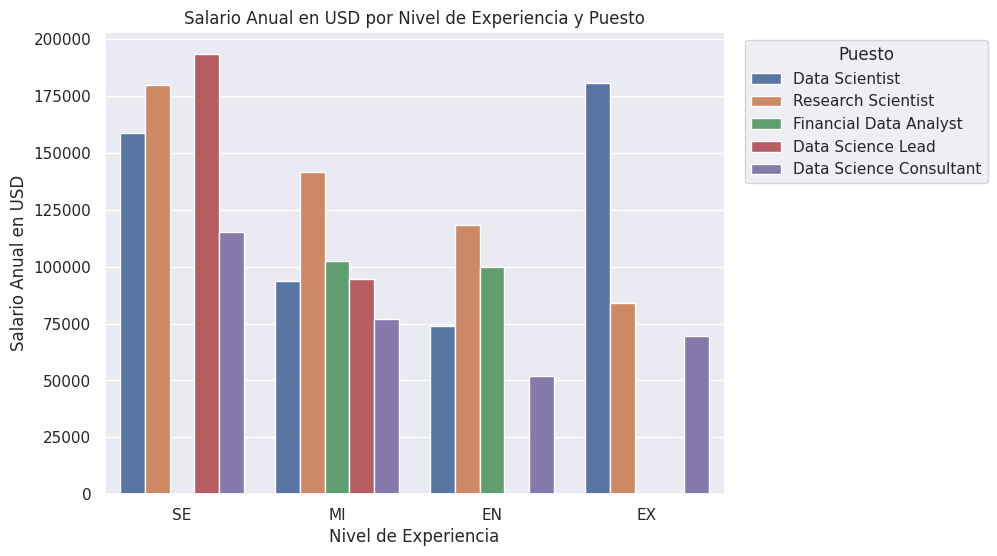

In [ ]:
# Bar plot gráfico de barras
sns.barplot(data=salarios, x='experience_level', y='salary_in_usd', hue='job_title_buscados', errorbar=None)

# Labels
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Anual en USD')
plt.title('Salario Anual en USD por Nivel de Experiencia y Puesto')
plt.legend(title='Puesto',bbox_to_anchor=(1.02, 1), loc='upper left')

sns.set(rc={'figure.figsize': (6, 4)})

plt.show()

Si bien faltan datos, podemos sacar algunas inferencias. En los descriptivos generales parecía que el nivel senior tenía salarios menores que el ejecutivo, pero segmentándolo por puestos podemos ver otras cuestiones.

- un data scientist consultant executive tiene menor salario que un senior.
- un research scientist executive tiene menor salario que un senior.
- un Financial Data Analyst de experiencia media ganaría lo mismo que un entry.

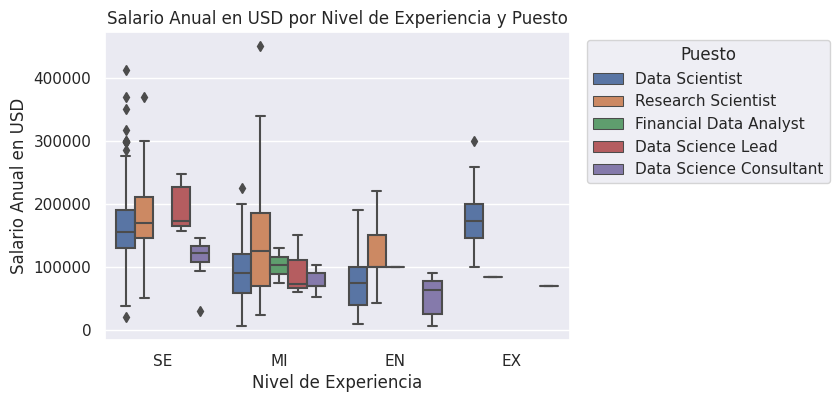

In [ ]:
# Box plot
sns.boxplot(data=salarios, x='experience_level', y='salary_in_usd', hue='job_title_buscados')

# Labels
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Anual en USD')
plt.title('Salario Anual en USD por Nivel de Experiencia y Puesto')

# leyenda a la derecha
plt.legend(title='Puesto', bbox_to_anchor=(1.02, 1), loc='upper left')

# tamaño de la figura
sns.set(rc={'figure.figsize': (6, 10)})

plt.show()

Hay muchos outliers. Para futuros trabajos se podría mejorar este proyecto realizando algún tratamiento de los outliers que permita revisar las conclusiones.

#**Conclusiones de los descriptivos y visualización**

**En cuanto al trabajo remoto y/o presencial:**
*	La modalidad mixta es la que mejor se adaptaría al presupuesto.

**En cuanto a la experiencia:**
*	Si la empresa quisiera contratar para algunos puestos gente mucho más
experimentada, se recomienda contratación de recursos senior.
* La diferencia de salario con el nivel executive es alta.
*	Por el contrario, si lo que se busca es contratar recursos con menor expertise, es recomendable un mid-level. La diferencia de salarios es poca respecto de un entry, y la misma se capitalizaría en el ahorro en capacitaciones.

**Por puesto y expertise:**
*	En líneas generales se observa que lo más conveniente en términos económicos, para todos los puestos, es el nivel medio de experiencia.
* Particularmente para el rol de Data Science Lead, por las características que requiere, sería recomendable tomar como referencia los datos de la experiencia senior (M= USD 193.400).
*	Un data scientist consultant executive puede tener menor salario que un senior.
*	Un research scientist executive puede tener menor salario que un senior.
*	Un Financial Data Analyst de experiencia media ganaría lo mismo que un entry.


#Regresión lineal

In [ ]:
salarios.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'remote_ratio', 'company_size', 'job_title_buscados',
       'experience_level2', 'experience_level_max'],
      dtype='object')

In [ ]:
salarios.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,job_title_buscados,experience_level2,experience_level_max
0,SE,FT,Principal Data Scientist,85847,100,L,NaN,NaN,SE
1,MI,CT,ML Engineer,30000,100,S,NaN,MI,NaN
2,MI,CT,ML Engineer,25500,100,S,NaN,MI,NaN
3,SE,FT,Data Scientist,175000,100,M,Data Scientist,NaN,SE
4,SE,FT,Data Scientist,120000,100,M,Data Scientist,NaN,SE


In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# Codificación de la variable "experience_level" mediante One-Hot Encoding
df_encoded = pd.get_dummies(salarios, columns=['experience_level'])

In [ ]:
df_encoded.head()

,employment_type,job_title,salary_in_usd,remote_ratio,company_size,job_title_buscados,experience_level2,experience_level_max,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,FT,Principal Data Scientist,85847,100,L,NaN,NaN,SE,0,0,0,1
1,CT,ML Engineer,30000,100,S,NaN,MI,NaN,0,0,1,0
2,CT,ML Engineer,25500,100,S,NaN,MI,NaN,0,0,1,0
3,FT,Data Scientist,175000,100,M,Data Scientist,NaN,SE,0,0,0,1
4,FT,Data Scientist,120000,100,M,Data Scientist,NaN,SE,0,0,0,1


**Regresión lineal múltiple**
* VIs: proporción de trabajo remoto y nivel de experiencia.
* VD: salario anual en dólares.


In [ ]:
y = df_encoded ['salary_in_usd']
x1 = df_encoded [['remote_ratio', 'experience_level_EN','experience_level_EX','experience_level_MI','experience_level_SE']]

In [ ]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     236.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.49e-181
Time:                        15:29:48   Log-Likelihood:                -46405.
No. Observations:                3755   AIC:                         9.282e+04
Df Residuals:                    3750   BIC:                         9.285e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.086e+05   1505.634     72.117      0.000    1.06e+05    1.12e+05
remote_ratio          -60.9080     18.971     -3.211      0.001     -98.102     -23.714
experience_level_EN -2.668e+04   2788.663     -9.566      0.000   -3.21e+04   -2.12e+04
experience_level_EX  8.929e+04   4299.319     20.768      0.000    8.09e+04    9.77e+04
experience_level_MI -1241.8449   2027.268     -0.613      0.540   -5216.500    2732.810
experience_level_SE  4.721e+04   1578.916     29.903      0.000    4.41e+04    5.03e+04
==============================================================================
Omnibus:                      400.251   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.952
Skew:                           0.710   Prob(JB):                    5.70e-161
Kurtosis:                       4.643   Cond. No.                     4.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

ACÁ NO DA SIGNIFICATIVO EL EXPERIENCE MI. SI LO SACO?

"EL MODELO GRAL ES SIG"

MODELO SIN exp_MI

In [ ]:
yr = df_encoded ['salary_in_usd']
xv = df_encoded [['remote_ratio', 'experience_level_EN','experience_level_EX','experience_level_SE']]

xe = sm.add_constant(xv)

resultss = sm.OLS(yr,xe).fit()

resultss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     236.3
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          3.49e-181
Time:                        22:00:33   Log-Likelihood:                -46405.
No. Observations:                3755   AIC:                         9.282e+04
Df Residuals:                    3750   BIC:                         9.285e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.073e+05   2172.004     49.420      0.000    1.03e+05    1.12e+05
remote_ratio          -60.9080     18.971     -3.211      0.001     -98.102     -23.714
experience_level_EN -2.543e+04   3729.918     -6.819      0.000   -3.27e+04   -1.81e+04
experience_level_EX  9.053e+04   5642.396     16.044      0.000    7.95e+04    1.02e+05
experience_level_SE  4.846e+04   2283.214     21.223      0.000     4.4e+04    5.29e+04
==============================================================================
Omnibus:                      400.251   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.952
Skew:                           0.710   Prob(JB):                    5.70e-161
Kurtosis:                       4.643   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Este modelo ajusta. Es decir, los niveles de experiencia entry, senior y executive, y la proporción de trabajo remoto, predicen el salario anual en USD en un 20%

**Regresión múltiple con remote_ratio y experiencia entry:**

In [ ]:
y11 = df_encoded ['salary_in_usd']
x11 = df_encoded [['remote_ratio', 'experience_level_EN']]

x22 = sm.add_constant(x11)

results11 = sm.OLS(y11,x22).fit()

results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           3.41e-72
Time:                        15:29:53   Log-Likelihood:                -46662.
No. Observations:                3755   AIC:                         9.333e+04
Df Residuals:                    3752   BIC:                         9.335e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.459e+05   1382.976    105.513      0.000    1.43e+05    1.49e+05
remote_ratio          -62.7743     20.309     -3.091      0.002    -102.592     -22.957
experience_level_EN -6.391e+04   3533.751    -18.086      0.000   -7.08e+04    -5.7e+04
==============================================================================
Omnibus:                      285.440   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.648
Skew:                           0.622   Prob(JB):                     4.09e-90
Kurtosis:                       4.040   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción de trabajo remoto y la experiencia entry modulan la variabilidad del salario en un 8%

**Regresión múltiple con remote_ratio y experiencia media:**

In [ ]:
y22 = df_encoded ['salary_in_usd']
x22 = df_encoded [['remote_ratio', 'experience_level_MI']]

x33 = sm.add_constant(x22)

results22 = sm.OLS(y22,x33).fit()

results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           7.25e-68
Time:                        15:33:24   Log-Likelihood:                -46672.
No. Observations:                3755   AIC:                         9.335e+04
Df Residuals:                    3752   BIC:                         9.337e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.505e+05   1458.592    103.149      0.000    1.48e+05    1.53e+05
remote_ratio          -83.5078     20.331     -4.107      0.000    -123.369     -43.647
experience_level_MI -4.207e+04   2406.807    -17.479      0.000   -4.68e+04   -3.73e+04
==============================================================================
Omnibus:                      273.084   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.930
Skew:                           0.557   Prob(JB):                     8.92e-98
Kurtosis:                       4.271   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción de trabajo remoto y la experiencia media modulan la variabilidad del salario en un 8%

**Regresión múltiple con remote_ratio y experiencia Senior:**

In [ ]:
y33 = df_encoded ['salary_in_usd']
x33 = df_encoded [['remote_ratio', 'experience_level_SE']]

x44 = sm.add_constant(x33)

results33 = sm.OLS(y33,x44).fit()

results33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.24e-109
Time:                        15:34:26   Log-Likelihood:                -46576.
No. Observations:                3755   AIC:                         9.316e+04
Df Residuals:                    3752   BIC:                         9.318e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.094e+05   1934.389     56.564      0.000    1.06e+05    1.13e+05
remote_ratio          -67.3764     19.829     -3.398      0.001    -106.253     -28.500
experience_level_SE  4.667e+04   2048.786     22.780      0.000    4.27e+04    5.07e+04
==============================================================================
Omnibus:                      468.900   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.578
Skew:                           0.809   Prob(JB):                    2.46e-189
Kurtosis:                       4.714   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción de trabajo remoto y la experiencia senior modulan la variabilidad del salario en un 12%

**Regresión múltiple con remote_ratio y experiencia ejecutiva:**

In [ ]:
y44 = df_encoded ['salary_in_usd']
x44 = df_encoded [['remote_ratio', 'experience_level_EX']]

x55 = sm.add_constant(x44)

results44 = sm.OLS(y44,x55).fit()

results44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.07e-25
Time:                        15:35:51   Log-Likelihood:                -46769.
No. Observations:                3755   AIC:                         9.354e+04
Df Residuals:                    3752   BIC:                         9.356e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.397e+05   1410.389     99.045      0.000    1.37e+05    1.42e+05
remote_ratio          -84.7832     20.865     -4.063      0.000    -125.690     -43.876
experience_level_EX  5.933e+04   5907.960     10.042      0.000    4.77e+04    7.09e+04
==============================================================================
Omnibus:                      205.316   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.917
Skew:                           0.520   Prob(JB):                     2.44e-59
Kurtosis:                       3.801   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción de trabajo remoto y la experiencia ejecutiva predicen la variabilidad del salario en un 3%

**Regresión lineal simple con remote_ratio**:

In [ ]:
yy = df_encoded ['salary_in_usd']
xx = df_encoded [['remote_ratio']]

x3 = sm.add_constant(xx)
results1 = sm.OLS(yy,x3).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     15.52
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.32e-05
Time:                        17:34:01   Log-Likelihood:                -46819.
No. Observations:                3755   AIC:                         9.364e+04
Df Residuals:                    3753   BIC:                         9.366e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.414e+05   1418.308     99.713      0.000    1.39e+05    1.44e+05
remote_ratio   -83.2768     21.140     -3.939      0.000    -124.723     -41.830
==============================================================================
Omnibus:                      224.062   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.694
Skew:                           0.550   Prob(JB):                     2.27e-65
Kurtosis:                       3.832   Cond. No.                         92.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción del trabajo remoto explica la variabilidad del salario en un .04%

**Regresión lineal simple con Entry como VI:**

In [ ]:
y5 = df_encoded ['salary_in_usd']
x5 = df_encoded [['experience_level_EN']]

x6 = sm.add_constant(x5)
results2 = sm.OLS(y5,x6).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     333.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.75e-71
Time:                        15:40:47   Log-Likelihood:                -46667.
No. Observations:                3755   AIC:                         9.334e+04
Df Residuals:                    3753   BIC:                         9.335e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.431e+05   1031.152    138.747      0.000    1.41e+05    1.45e+05
experience_level_EN -6.452e+04   3532.260    -18.267      0.000   -7.14e+04   -5.76e+04
==============================================================================
Omnibus:                      282.956   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.847
Skew:                           0.618   Prob(JB):                     2.74e-89
Kurtosis:                       4.038   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si bien el p value es significativo, el modelo sólo explica el 8% de la variabilidad.

**Regresión lineal simple con experiencia media como VI:**

In [ ]:
y7 = df_encoded ['salary_in_usd']
x7 = df_encoded [['experience_level_MI']]

x8 = sm.add_constant(x7)
results3 = sm.OLS(y7,x8).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     304.1
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           1.50e-65
Time:                        21:56:58   Log-Likelihood:                -46681.
No. Observations:                3755   AIC:                         9.337e+04
Df Residuals:                    3753   BIC:                         9.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.466e+05   1116.736    131.264      0.000    1.44e+05    1.49e+05
experience_level_MI -4.206e+04   2411.891    -17.439      0.000   -4.68e+04   -3.73e+04
==============================================================================
Omnibus:                      267.753   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.397
Skew:                           0.547   Prob(JB):                     2.34e-96
Kurtosis:                       4.272   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si bien el p value es significativo, el modelo sólo explica el 7% de la variabilidad.

**Regresión lineal simple con Senior como VI:**

In [ ]:
y8 = df_encoded ['salary_in_usd']
x8 = df_encoded [['experience_level_SE']]

x9 = sm.add_constant(x8)
results4 = sm.OLS(y8,x9).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     523.6
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          1.37e-108
Time:                        21:57:05   Log-Likelihood:                -46582.
No. Observations:                3755   AIC:                         9.317e+04
Df Residuals:                    3753   BIC:                         9.318e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.061e+05   1678.367     63.237      0.000    1.03e+05    1.09e+05
experience_level_SE  4.692e+04   2050.391     22.882      0.000    4.29e+04    5.09e+04
==============================================================================
Omnibus:                      464.600   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.399
Skew:                           0.805   Prob(JB):                    4.86e-186
Kurtosis:                       4.691   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo explica el 12% de la variabilidad.

**Regresión lineal simple con Executive como VI:**

In [ ]:
ya = df_encoded ['salary_in_usd']
xb = df_encoded [['experience_level_EX']]

x10 = sm.add_constant(xb)
results5 = sm.OLS(ya,x10).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     99.85
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           3.19e-23
Time:                        21:57:11   Log-Likelihood:                -46778.
No. Observations:                3755   AIC:                         9.356e+04
Df Residuals:                    3753   BIC:                         9.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.358e+05   1031.500    131.628      0.000    1.34e+05    1.38e+05
experience_level_EX  5.916e+04   5920.003      9.993      0.000    4.75e+04    7.08e+04
==============================================================================
Omnibus:                      200.740   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.379
Skew:                           0.510   Prob(JB):                     2.36e-58
Kurtosis:                       3.810   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si bien el p value es significativo, el modelo sólo explica el 2% de la variabilidad.

**Regresión lineal múltiple sólo con niveles de experiencia:**

In [ ]:
yw = df_encoded ['salary_in_usd']
xz = df_encoded [['experience_level_EN','experience_level_EX','experience_level_MI','experience_level_SE']]

x11 = sm.add_constant(xz)

results6 = sm.OLS(yw,x11).fit() #esto que llamé "results" lo voy a usar después para hacer predicciones con nuevos datos.

results6.summary() #no da nada significativo..

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          3.57e-178
Time:                        21:57:50   Log-Likelihood:                -46412.
No. Observations:                3755   AIC:                         9.283e+04
Df Residuals:                    3750   BIC:                         9.287e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.116e+17   2.93e+17      1.406      0.160   -1.62e+17    9.85e+17
experience_level_EN -4.116e+17   2.93e+17     -1.406      0.160   -9.85e+17    1.62e+17
experience_level_EX -4.116e+17   2.93e+17     -1.406      0.160   -9.85e+17    1.62e+17
experience_level_MI -4.116e+17   2.93e+17     -1.406      0.160   -9.85e+17    1.62e+17
experience_level_SE -4.116e+17   2.93e+17     -1.406      0.160   -9.85e+17    1.62e+17
==============================================================================
Omnibus:                      404.943   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.786
Skew:                           0.720   Prob(JB):                    2.28e-161
Kurtosis:                       4.629   Cond. No.                     8.84e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.45e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#voy a probar una regresión lineal múltiple codificando la experiencia de 1 a 4 (asumiendo que existe la misma distancia entre las categorías/modalidades de la variable)

# Creo el objeto LabelEncoder
label_encoder = LabelEncoder()

# transformo la columna 'experience_level'
salarios['experience_level_encoded'] = label_encoder.fit_transform(salarios['experience_level']) + 1

salarios

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,job_title_buscados,experience_level2,experience_level_max,experience_level_encoded
0,SE,FT,Principal Data Scientist,85847,100,L,NaN,NaN,SE,4
1,MI,CT,ML Engineer,30000,100,S,NaN,MI,NaN,3
2,MI,CT,ML Engineer,25500,100,S,NaN,MI,NaN,3
3,SE,FT,Data Scientist,175000,100,M,Data Scientist,NaN,SE,4
4,SE,FT,Data Scientist,120000,100,M,Data Scientist,NaN,SE,4
...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,100,L,Data Scientist,NaN,SE,4
3751,MI,FT,Principal Data Scientist,151000,100,L,NaN,MI,NaN,3
3752,EN,FT,Data Scientist,105000,100,S,Data Scientist,EN,NaN,1
3753,EN,CT,Business Data Analyst,100000,100,L,NaN,EN,NaN,1


Regresión múltiple con experience_level codificado y remote_ratio

In [ ]:
y66 = salarios ['salary_in_usd']
x66 = salarios [['remote_ratio','experience_level_encoded']]

x77 = sm.add_constant(x66)

results66 = sm.OLS(y66,x77).fit()

results66.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           6.00e-95
Time:                        15:53:35   Log-Likelihood:                -46610.
No. Observations:                3755   AIC:                         9.323e+04
Df Residuals:                    3752   BIC:                         9.324e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6.201e+04   4006.107     15.478      0.000    5.42e+04    6.99e+04
remote_ratio               -60.5153     20.025     -3.022      0.003     -99.777     -21.254
experience_level_encoded  2.259e+04   1073.646     21.039      0.000    2.05e+04    2.47e+04
==============================================================================
Omnibus:                      441.747   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.310
Skew:                           0.795   Prob(JB):                    1.78e-166
Kurtosis:                       4.533   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proporción de trabajo remoto y el nivel de experiencia predicen en un 10% el salario.

**Regresión simple con experience_level_encoded:**

In [ ]:
y77 = salarios ['salary_in_usd']
x77 = salarios [['experience_level_encoded']]

x88 = sm.add_constant(x77)

results77 = sm.OLS(y77,x88).fit()

results77.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     449.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.15e-94
Time:                        15:55:49   Log-Likelihood:                -46614.
No. Observations:                3755   AIC:                         9.323e+04
Df Residuals:                    3753   BIC:                         9.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      5.86e+04   3848.236     15.227      0.000    5.11e+04    6.61e+04
experience_level_encoded  2.276e+04   1073.239     21.210      0.000    2.07e+04    2.49e+04
==============================================================================
Omnibus:                      438.614   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              753.427
Skew:                           0.793   Prob(JB):                    2.49e-164
Kurtosis:                       4.517   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El nivel de experiencia predice en un 10% el salario.

# **Predicciones**

Remote_ratio + experience_level_encoded

In [ ]:
new_data = pd.DataFrame({'const': 1, 'experience_level_encoded': [1, 3, 2], 'remote_ratio': [0, 50, 100]}) #esto es un data frame nuevo creado.

new_data = new_data[['const', 'remote_ratio', 'experience_level_encoded']] #le doy el nuevo orden a las columnas.
new_data

,const,remote_ratio,experience_level_encoded
0,1,0,1
1,1,50,3
2,1,100,2


In [ ]:
predictions = results66.predict(new_data) #antes yo llamé "results66" al modelo.
#Entonces lo llamo y le pido que prediga qué salarios se deducen del nuevo data set.

predictions
#el estudiante 0 va a tener un GPA de 3.023513

0     84593.698338
1    126745.243493
2    101130.823110
dtype: float64

* Experiencia entry (1) + trabajo 100% presencial (0) = sueldo usd 84593.69
* Experiencia Senior (3) + mixto (50) = sueldo usd 126745.24
* Experiencia media (1) + trabajo 100% remoto (100) = sueldo usd 101130.82

Se podría jugar y poner en el data set nuevo las características de los potenciales empleados.

# Conclusiones de las regresiones

Por supuesto que estuve "jugando" con los datos, y de todo esto hay que seleccionar cuál es la información más relevante a la hora de realizar un informe que guíe la toma de decisiones de la mejor manera posible.

Hasta aquí, los modelos que predijeron la variabilidad del salario en mayor medida fueron:
* remote_ratio y experience_level_encoded predicen en un 10% la variabilidad del salario.
* experience_level_encoded predice en un 10% la variabilidad del salario.
* expertise senior + remote_ratio predicen en un 12% la variabilidad del salario.

Sin embargo, ninguno de estos modelos presenta realmente un buen ajuste.

#Correlación lineal y selección de características

Por defecto, las correlaciones se hacen antes de las regresiones. De esa manera hubiera podido tener una "pista" de qué variables incluir para obtener el mejor modelo posible, y no probar a ciegas, sin saber las correlaciones de antemano.

In [ ]:
salarios

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,job_title_buscados,experience_level2,experience_level_max,experience_level_encoded
0,SE,FT,Principal Data Scientist,85847,100,L,NaN,NaN,SE,4
1,MI,CT,ML Engineer,30000,100,S,NaN,MI,NaN,3
2,MI,CT,ML Engineer,25500,100,S,NaN,MI,NaN,3
3,SE,FT,Data Scientist,175000,100,M,Data Scientist,NaN,SE,4
4,SE,FT,Data Scientist,120000,100,M,Data Scientist,NaN,SE,4
...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,100,L,Data Scientist,NaN,SE,4
3751,MI,FT,Principal Data Scientist,151000,100,L,NaN,MI,NaN,3
3752,EN,FT,Data Scientist,105000,100,S,Data Scientist,EN,NaN,1
3753,EN,CT,Business Data Analyst,100000,100,L,NaN,EN,NaN,1


In [ ]:
salarios2 = salarios.drop(['experience_level','employment_type','job_title','company_size', 'job_title_buscados','experience_level2','experience_level_max'], axis=1)

salarios2

,salary_in_usd,remote_ratio,experience_level_encoded
0,85847,100,4
1,30000,100,3
2,25500,100,3
3,175000,100,4
4,120000,100,4
...,...,...,...
3750,412000,100,4
3751,151000,100,3
3752,105000,100,1
3753,100000,100,1


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = salarios2.corr()

# Visualizar la matriz de correlación
correlation_matrix

,salary_in_usd,remote_ratio,experience_level_encoded
salary_in_usd,1.000000,-0.064171,0.327173
remote_ratio,-0.064171,1.000000,-0.054025
experience_level_encoded,0.327173,-0.054025,1.000000


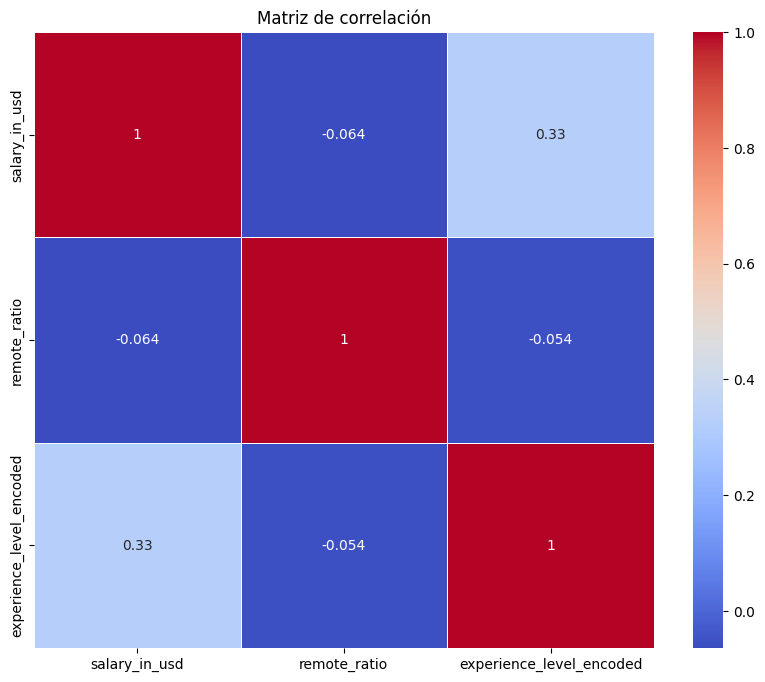

In [ ]:
# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Filtrar las características con correlación mayor a 0.3 con respecto a mi variable de salida "salary_in_usd"
seleccionadas = correlation_matrix[abs(correlation_matrix['salary_in_usd']) > 0.3]['salary_in_usd']

seleccionadas

salary_in_usd               1.000000
experience_level_encoded    0.327173
Name: salary_in_usd, dtype: float64

In [ ]:
# Función para realizar Backward Elimination
def backward_elimination(data, target_column, significance_level=0.05):
    features = data.drop(target_column, axis=1)
    target = data[target_column]
    num_features = len(features.columns)
    while True:
        model = sm.OLS(target, features).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            max_feature_idx = model.pvalues.idxmax()
            features = features.drop(max_feature_idx, axis=1)
        else:
            break
    return features
    #Hasta acá no hay que cambiar nada del código.

# Aplicar Backward Elimination al DataFrame
seleccionadas = backward_elimination(salarios2, target_column='salary_in_usd') #LA VARIABLE DE SALIDA o target

# Mostrar las características seleccionadas
print("Características seleccionadas:", seleccionadas.columns) #acá me va a decir cuáles tienen un p value mayor a 0.05

Características seleccionadas: Index(['experience_level_encoded'], dtype='object')


La única correlación significativa es entre salary_in_usd y experience_level_encoded (r = 0.33; p < 0.05)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separar características y variable objetivo
X = salarios2.drop('salary_in_usd', axis=1) #x son todas aquellas variables que NO son class (o sea que no son mi variable de salida o vd) - por eso dice .drop
y = salarios2['salary_in_usd']

# Aplicar selección univariante
selector = SelectKBest(score_func=f_classif, k='all')  # Seleccionar características 'all'
X_selected = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['remote_ratio', 'experience_level_encoded'], dtype='object')


En este caso, me selecciona tanto remote_ratio como experience_level_encoded. En las regresiones hechas anteriormente, se puede ver que uno de los modelos que predice la variabilidad del salario en mayor medida es justamente el que tiene como variables predictoras a estas dos.

#Futuras líneas de investigación

Otros modelos/predicciones a probar

1. Suponiendo que la empresa fuera mediana (company_size como vi), ¿a personas con qué grado de expertise se suele emplear? ¿Qué seniority conviene? (experience_level como vd).

2. ¿La cantidad de salarios anual en usd predice el tipo de empleo? "Full-time", "Part-time", "Contract", etc. (salary_in_usd como vi, remote_ratio como vd).

3. Si en el presupuesto tengo x cantidad de usd anuales para contratar un empleado. ¿Qué tipo de empleo se le puede exigir? "Full-time", "Part-time", "Contract", etc.

#Conclusiones generales

**En cuanto al trabajo remoto y/o presencial:**
*	La modalidad mixta es la que mejor se adaptaría al presupuesto.

**En cuanto a la experiencia:**
*	Si la empresa quisiera contratar para algunos puestos gente mucho más
experimentada, se recomienda contratación de recursos senior, ya que la diferencia de salario con el nivel executive es alta.
*	Por el contrario, si lo que se busca es contratar recursos con menor expertise, es recomendable un mid-level. La diferencia de salarios es poca respecto de un entry, y la misma se capitalizaría en el ahorro en capacitaciones.

**Por puesto y expertise:**
*	En líneas generales se observa que lo más conveniente en términos económicos, para todos los puestos, es el nivel medio de experiencia.
* Particularmente para el rol de Data Science Lead, por las características que requiere, sería recomendable tomar como referencia los datos de la experiencia senior (M= USD 193.400 anuales).
*	Un data scientist consultant executive puede tener menor salario que un senior.
*	Un research scientist executive puede tener menor salario que un senior.
*	Un Financial Data Analyst de experiencia media ganaría lo mismo que un entry.

**Los modelos que predijeron la variabilidad del salario en mayor medida fueron:**
* La proporción de trabajo remoto y la experiencia predicen en un 10% la variabilidad del salario.
* La proporción de trabajo remoto predice en un 10% la variabilidad del salario.
* La expertise senior y la proporción de trabajo remoto predicen en un 12% la variabilidad del salario.

**Sin embargo, ninguno de estos modelos presenta realmente un buen ajuste, por lo que habría que seguir probando y entrenando modelos para conseguir ajustes adecuados y, en consecuencia, predicciones más precisas.**